### Load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import exploration.commons as pltutil
from exploration.comments_exploration import cloud


utterances_df = pd.read_csv('./temp_data/pp_utterances.csv')
len(utterances_df)


30064

In [2]:
df_grp = utterances_df[['id','author_role']].groupby('author_role').count().reset_index().rename(columns={'author_role':'Author Role','id':'Count'})
df_grp = df_grp.set_index('Author Role')
df_grp.transpose()

Author Role,assignee,others,reporter
Count,12793,11570,5701


In [3]:
# utterances_df = utterances_df[utterances_df['author_role'] == 'assignee']

### Words exploration

#### Words cloud

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


(8564, 29798)

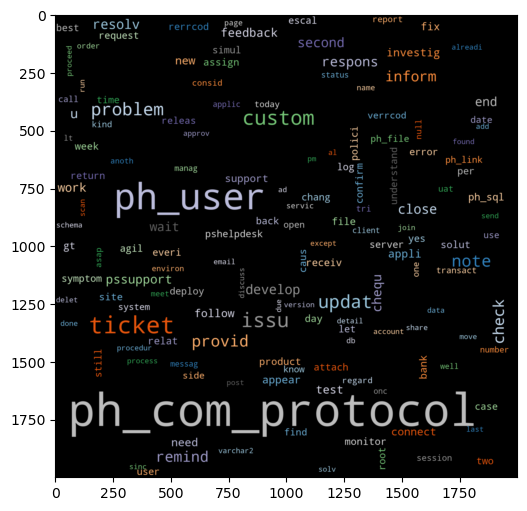

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cloud_df = utterances_df[['pp_actionbody','author','author_role']].reset_index()
cloud_df = cloud_df[~pd.isna(cloud_df['pp_actionbody'])]
cloud_df.drop_duplicates()
cloud(cloud_df,ax,max_words=150)

In [5]:
utterances_df[['words_count','pp_words_count']].describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,30064.0,7.230076,12.681574,1.0,1.0,2.0,10.0,436.0
Words Count (Preprocessed),30064.0,4.420270,8.098081,0.0,1.0,2.0,6.0,346.0


#### Words count per issue

In [6]:
words_per_issue_df = utterances_df[['issueid','words_count','pp_words_count']].groupby("issueid").sum()

In [7]:
words_per_issue_df.describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,360.0,603.791667,763.993753,113.0,238.50,358.5,712.00,9619.0
Words Count (Preprocessed),360.0,369.141667,496.499591,67.0,144.75,221.0,422.75,6486.0


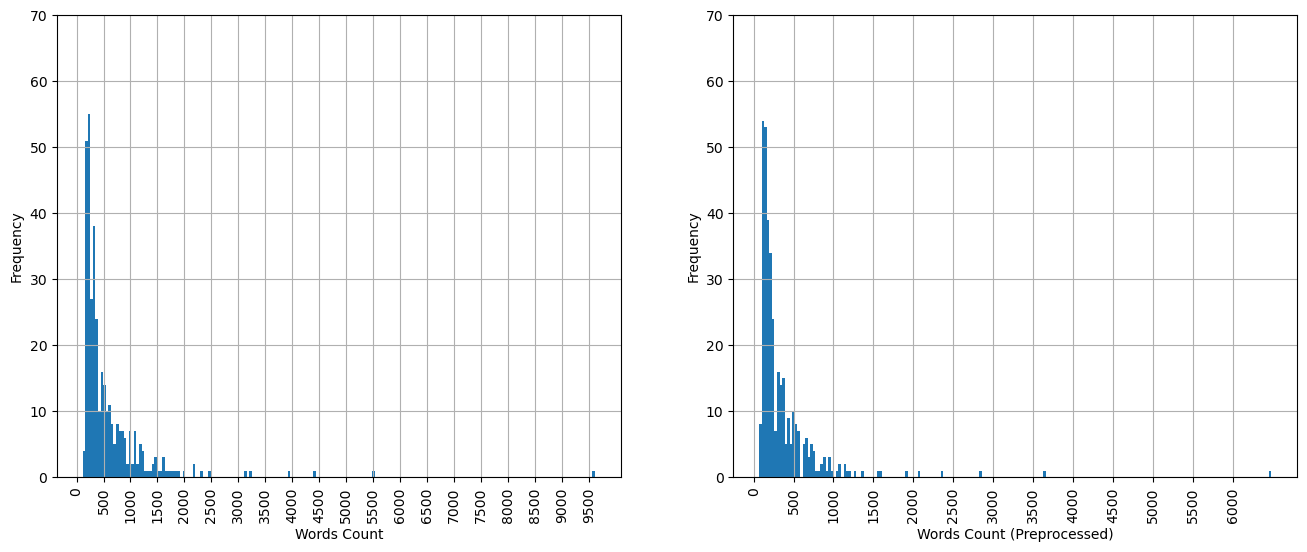

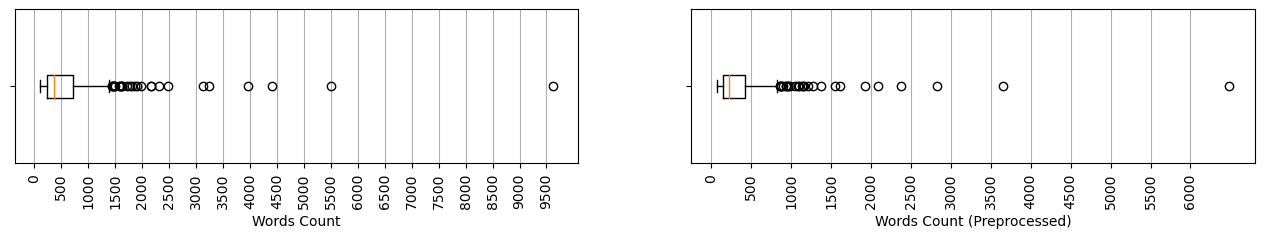

In [20]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)

pltutil.plot_hist(ax, 
        words_per_issue_df['words_count'], 
        bins=200,
        xlabel='Words Count',
        ylabel='Frequency',
        grid='both', 
        max_y=80,
        xsteps=500,
        ysteps=10,
        xrotation=90)

ax = fig.add_subplot(122)

pltutil.plot_hist(ax, 
        words_per_issue_df['pp_words_count'], 
        bins=200,
        xlabel='Words Count (Preprocessed)',
        ylabel='Frequency',
        grid='both', 
        max_y=80,
        xsteps=500,
        ysteps=10,
        xrotation=90)

fig = plt.figure(figsize=(16,2))
ax = fig.add_subplot(121)
pltutil.plot_box(ax,
                  words_per_issue_df['words_count'], 
                  label='Words Count',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

ax = fig.add_subplot(122)
pltutil.plot_box(ax,
                  words_per_issue_df['pp_words_count'], 
                  label='Words Count (Preprocessed)',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

#### Words per comment

In [9]:
words_per_comment_df = utterances_df[['id','issueid','words_count','pp_words_count']].groupby(['id','issueid']).sum()
words_per_comment_df.head(3)

,,words_count,pp_words_count
id,issueid,,
1045407.0,1004298.0,47,27
1045408.0,1004298.0,64,38
1045412.0,1004298.0,27,15


In [10]:
words_per_comment_df[['words_count','pp_words_count']].describe().rename(columns={'words_count':'Words Count','pp_words_count':'Words Count (Preprocessed)'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Words Count,7288.0,29.825055,87.247391,1.0,12.0,19.0,34.0,4036.0
Words Count (Preprocessed),7288.0,18.234221,59.197190,0.0,8.0,11.0,20.0,2769.0


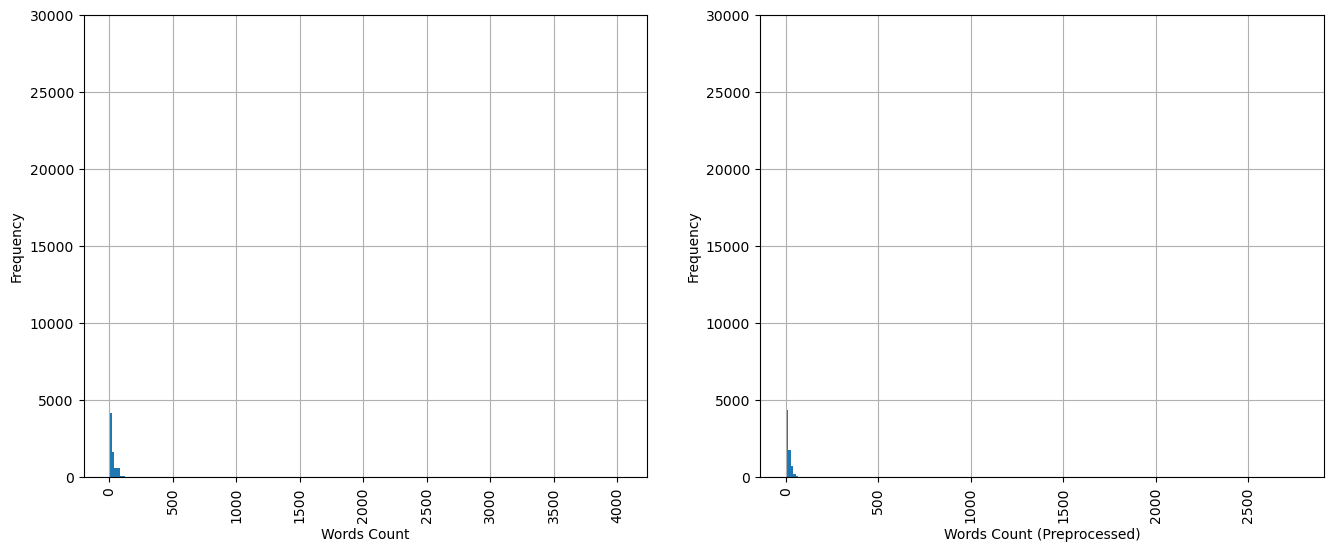

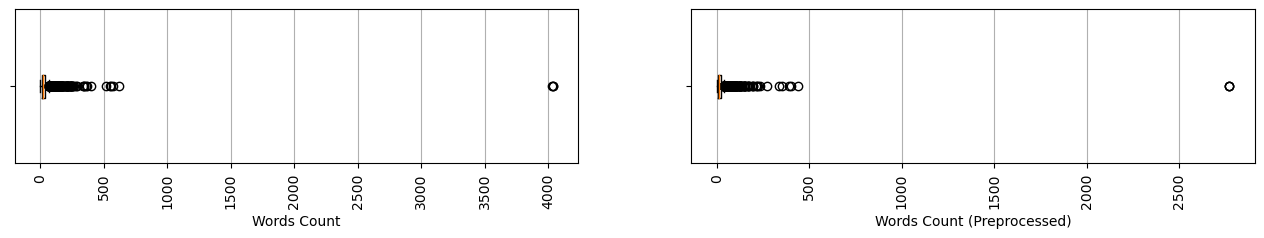

In [11]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)

pltutil.plot_hist(ax, 
        words_per_comment_df['words_count'], 
        bins=200,
        xlabel='Words Count',
        ylabel='Frequency',
        grid='both', 
        max_y=35000,
        xsteps=500,
        ysteps=5000,
        xrotation=90)

ax = fig.add_subplot(122)

pltutil.plot_hist(ax, 
        words_per_comment_df['pp_words_count'], 
        bins=200,
        xlabel='Words Count (Preprocessed)',
        ylabel='Frequency',
        grid='both', 
        max_y=35000,
        xsteps=500,
        ysteps=5000,
        xrotation=90)

fig = plt.figure(figsize=(16,2))
ax = fig.add_subplot(121)
pltutil.plot_box(ax,
                  words_per_comment_df['words_count'], 
                  label='Words Count',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

ax = fig.add_subplot(122)
pltutil.plot_box(ax,
                  words_per_comment_df['pp_words_count'], 
                  label='Words Count (Preprocessed)',
                  vertical=False,
                  steps=500,
                  grid='x',
                  rotation=90)

### Utterances exploration

In [12]:
comments_per_issue_df = utterances_df[['issueid', 'id', 'utr_seq']].groupby(['issueid', 'id']).count()
comments_per_issue_df = comments_per_issue_df.rename(columns={'utr_seq': 'utterances_count'})
comments_per_issue_df.head(10)

utterances_count
issueid   id                         
1004298.0 1045407.0                 7
          1045408.0                 1
          1045412.0                 2
          1046266.0                 2
          1046414.0                 2
          1048581.0                18
          1049252.0                 2
          1050174.0                 2
          1050775.0                 3
          1050782.0                 2

In [13]:
comments_per_issue_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
utterances_count,7288.0,4.125137,4.201784,1.0,2.0,4.0,5.0,134.0


In [14]:
utter_per_issue_df = comments_per_issue_df.groupby('issueid').sum('utterances_count')
utter_per_issue_df.head(5)

,utterances_count
issueid,
1004298.0,224
1004357.0,20
1004361.0,128
1004362.0,166
1004364.0,31


In [15]:
utter_per_issue_df.describe().rename(columns={'utterances_count':'Utterances Count'}).transpose()

,count,mean,std,min,25%,50%,75%,max
Utterances Count,360.0,83.511111,93.117561,9.0,32.0,49.0,98.5,717.0


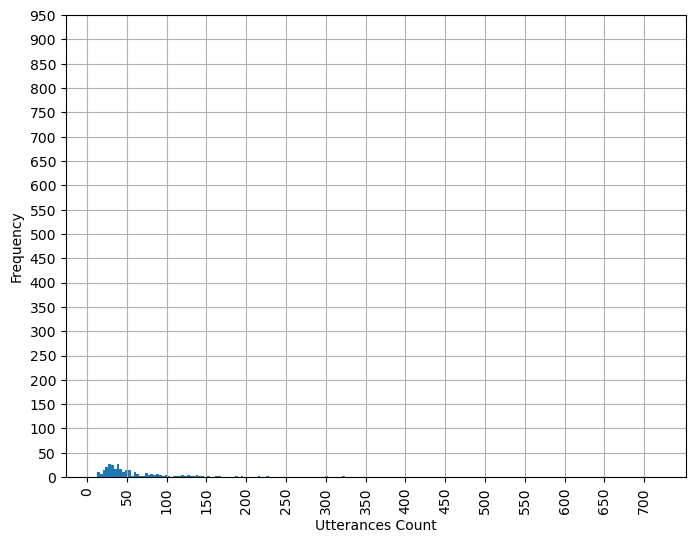

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

pltutil.plot_hist(ax, 
        utter_per_issue_df['utterances_count'], 
        bins=200,
        xlabel='Utterances Count',
        ylabel='Frequency',
        grid='both', 
        max_y=1000,
        xsteps=50,
        ysteps=50,
        xrotation=90)

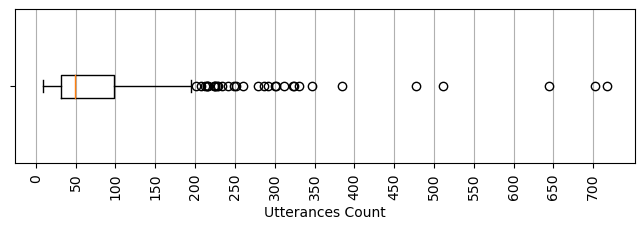

In [17]:
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
pltutil.plot_box(ax,
                  utter_per_issue_df['utterances_count'], 
                  label='Utterances Count',
                  vertical=False,
                  steps=50,
                  grid='x',
                  rotation=90)
